In [2]:
# tensorflow version
import tensorflow
print('tensorflow: %s' % tensorflow.__version__)
# keras version
import keras
print('keras: %s' % keras.__version__)

tensorflow: 2.15.0
keras: 2.15.0


Extracting Features from Data Set

In [7]:
from os import listdir
from pickle import dump
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model

# extract features from each photo in the directory
def extract_features(directory):
	# load the model
	model = VGG16()
	# re-structure the model
	model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
	# summarize
	print(model.summary())
	# extract features from each photo
	features = dict()
	for name in listdir(directory):
		# load an image from file
		filename = directory + '/' + name
		image = load_img(filename, target_size=(224, 224))
		# convert the image pixels to a numpy array
		image = img_to_array(image)
		# reshape data for the model
		image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
		# prepare the image for the VGG model
		image = preprocess_input(image)
		# get features
		feature = model.predict(image, verbose=0)
		# get image id
		image_id = name.split('.')[0]
		# store feature
		features[image_id] = feature
		print('>%s' % name)
	return features

# extract features from all images
# directory = 'Flickr8k_Dataset/Flicker8k_Dataset'
directory = 'flickr30k_images'
features = extract_features(directory)
print('Extracted Features: %d' % len(features))
# save to file
dump(features, open('features30k.pkl', 'wb'))

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

KeyboardInterrupt: 

In [3]:
from os import listdir
from pickle import dump
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
from tqdm import tqdm
import time

# extract features from each photo in the directory
def extract_features(directory):
    # load the model
    model = VGG16()
    # re-structure the model
    model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

    # get the list of files in the directory
    file_list = listdir(directory)

    # initialize progress bar
    progress_bar = tqdm(total=len(file_list), desc="Extracting Features", unit="image")

    # initialize features dictionary
    features = dict()

    # record start time
    start_time = time.time()

    for name in file_list:
        # load an image from file
        filename = directory + '/' + name
        image = load_img(filename, target_size=(224, 224))
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        # reshape data for the model
        image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
        # prepare the image for the VGG model
        image = preprocess_input(image)
        # get features
        feature = model.predict(image, verbose=0)
        # get image id
        image_id = name.split('.')[0]
        # store feature
        features[image_id] = feature
        progress_bar.update(1)

    # close progress bar
    progress_bar.close()

    # calculate elapsed time
    elapsed_time = time.time() - start_time
    print(f"Feature extraction completed in {elapsed_time:.2f} seconds")

    return features

# extract features from all images
directory = 'flickr30k_images'
features = extract_features(directory)
print('Extracted Features: %d' % len(features))

# save to file
dump(features, open('features30k.pkl', 'wb'))


Extracting Features: 100%|██████████████████████████████████████████████████| 31783/31783 [2:55:50<00:00,  3.01image/s]


Feature extraction completed in 10550.76 seconds
Extracted Features: 31783


Removing Unidentified images form dataset

In [5]:
from os import listdir, remove
from os.path import isfile, join
from PIL import Image, UnidentifiedImageError

def remove_unidentified_images(directory):
    removed_count = 0
    total_count = 0

    for name in listdir(directory):
        total_count += 1
        # get the full file path
        filename = join(directory, name)

        try:
            # try to open the image
            img = Image.open(filename)
        except UnidentifiedImageError as e:
            print(f"Error processing {filename}: {str(e)}")
            # Remove the file that caused the error
            remove(filename)
            removed_count += 1

    print(f"Total Images: {total_count}")
    print(f"Removed Images: {removed_count}")

# Example usage
directory = 'flickr30k_images'
remove_unidentified_images(directory)


Total Images: 31783
Removed Images: 0


In [9]:
# import os

# def extract_image_names_and_compare(description_file_path, image_directory):
#     with open(description_file_path, 'r') as description_file:
#         lines = description_file.readlines()

#     # Initialize a set to store unique image names
#     unique_image_names = set()

#     for i in range(0, len(lines), 5):
#         # Extract image name from the first line of each group
#         image_name = lines[i].split()[0]
#         unique_image_names.add(image_name)

#     # Check for each image file in the directory
#     for filename in os.listdir(image_directory):
#         image_name, _ = os.path.splitext(filename)

#         # Check if the image name is in the set of unique image names
#         if image_name not in unique_image_names:
#             print(f"Image not found in description file: {filename}")

# # Example usage
# description_file_path = 'descriptions30k.txt'
# image_directory = 'E:/Downloads/flickr30k-images/flickr30k-images'
# extract_image_names_and_compare(description_file_path, image_directory)



import os

def extract_image_names_and_compare(description_file_path, image_directory):
    with open(description_file_path, 'r') as description_file:
        lines = description_file.readlines()

    # Initialize a set to store unique image names
    unique_image_names = set()

    for i in range(0, len(lines), 5):
        # Extract image name from the first line of each group
        image_name = lines[i].split()[0]
        unique_image_names.add(image_name)

    # Initialize counters
    found_count = 0
    not_found_count = 0

    # Check for each image file in the directory
    for filename in os.listdir(image_directory):
        image_name, _ = os.path.splitext(filename)

        # Check if the image name is in the set of unique image names
        if image_name in unique_image_names:
            print(f"Found in description file: {filename}")
            found_count += 1
        else:
            print(f"Not found in description file: {filename}")
            not_found_count += 1

    # Print counts
    print(f"\nFiles found in description file: {found_count}")
    print(f"Files not found in description file: {not_found_count}")

# Example usage
description_file_path = 'descriptions30k.txt'
image_directory = 'flickr30k_images'
extract_image_names_and_compare(description_file_path, image_directory)



Found in description file: 1000092795.jpg
Found in description file: 10002456.jpg
Found in description file: 1000268201.jpg
Found in description file: 1000344755.jpg
Found in description file: 1000366164.jpg
Found in description file: 1000523639.jpg
Found in description file: 1000919630.jpg
Found in description file: 10010052.jpg
Found in description file: 1001465944.jpg
Found in description file: 1001545525.jpg
Found in description file: 1001573224.jpg
Found in description file: 1001633352.jpg
Found in description file: 1001773457.jpg
Found in description file: 1001896054.jpg
Found in description file: 100197432.jpg
Found in description file: 100207720.jpg
Found in description file: 1002674143.jpg
Found in description file: 1003163366.jpg
Found in description file: 1003420127.jpg
Found in description file: 1003428081.jpg
Found in description file: 100444898.jpg
Found in description file: 1005216151.jpg
Found in description file: 100577935.jpg
Found in description file: 1006452823.jpg


In [11]:
# import os
# from PIL import Image, UnidentifiedImageError

# def is_valid_image(file_path):
#     try:
#         Image.open(file_path)
#         return True
#     except (IOError, UnidentifiedImageError):
#         return False

# def remove_invalid_images(directory):
#     count_removed = 0
#     for filename in os.listdir(directory):
#         file_path = os.path.join(directory, filename)
#         if not is_valid_image(file_path):
#             print(f"Removing invalid image: {file_path}")
#             os.remove(file_path)
#             count_removed += 1

#     print(f"Total invalid images removed: {count_removed}")

# # Example usage:
# directory_to_clean = 'Dataset/Images'
# remove_invalid_images(directory_to_clean)


Total invalid images removed: 0


Description For FLickr8k dataset

In [2]:
import string

# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# extract descriptions for images
def load_descriptions(doc):
	mapping = dict()
	# process lines
	for line in doc.split('\n'):
		# split line by white space
		tokens = line.split()
		if len(line) < 2:
			continue
		# take the first token as the image id, the rest as the description
		image_id, image_desc = tokens[0], tokens[1:]
		# remove filename from image id
		image_id = image_id.split('.')[0]
		# convert description tokens back to string
		image_desc = ' '.join(image_desc)
		# create the list if needed
		if image_id not in mapping:
			mapping[image_id] = list()
		# store description
		mapping[image_id].append(image_desc)
	return mapping

def clean_descriptions(descriptions):
	# prepare translation table for removing punctuation
	table = str.maketrans('', '', string.punctuation)
	for key, desc_list in descriptions.items():
		for i in range(len(desc_list)):
			desc = desc_list[i]
			# tokenize
			desc = desc.split()
			# convert to lower case
			desc = [word.lower() for word in desc]
			# remove punctuation from each token
			desc = [w.translate(table) for w in desc]
			# remove hanging 's' and 'a'
			desc = [word for word in desc if len(word)>1]
			# remove tokens with numbers in them
			desc = [word for word in desc if word.isalpha()]
			# store as string
			desc_list[i] =  ' '.join(desc)

# convert the loaded descriptions into a vocabulary of words
def to_vocabulary(descriptions):
	# build a list of all description strings
	all_desc = set()
	for key in descriptions.keys():
		[all_desc.update(d.split()) for d in descriptions[key]]
	return all_desc

# save descriptions to file, one per line
def save_descriptions(descriptions, filename):
	lines = list()
	for key, desc_list in descriptions.items():
		for desc in desc_list:
			lines.append(key + ' ' + desc)
	data = '\n'.join(lines)
	file = open(filename, 'w')
	file.write(data)
	file.close()

# filename = 'Flickr8k_text/Flickr8k.token.txt'
filename = 'tokenized_caption.token.txt'
# load descriptions
doc = load_doc(filename)
# parse descriptions
descriptions = load_descriptions(doc)
print('Loaded: %d ' % len(descriptions))
# clean descriptions
clean_descriptions(descriptions)
# summarize vocabulary
vocabulary = to_vocabulary(descriptions)
print('Vocabulary Size: %d' % len(vocabulary))
# save to file
save_descriptions(descriptions, 'descriptions30k.txt')

UnicodeDecodeError: 'charmap' codec can't decode byte 0x9d in position 10457209: character maps to <undefined>

Description For FLickr30k dataset

In [2]:
import string
import nltk
from nltk.tokenize import word_tokenize

# download nltk resources
nltk.download('punkt')

# load doc into memory
def load_doc(filename):
    # open the file as read only with utf-8 encoding
    with open(filename, 'r', encoding='utf-8') as file:
        # read all text
        text = file.read()
    return text

# extract descriptions for images
def load_descriptions(doc):
    mapping = dict()
    # process lines
    for line in doc.split('\n'):
        # split line by white space
        tokens = line.split()
        if len(line) < 2:
            continue
        # take the first token as the image id, the rest as the description
        image_id, image_desc = tokens[0], tokens[1:]
        # remove filename from image id
        image_id = image_id.split('.')[0]
        # convert description tokens back to string
        image_desc = ' '.join(image_desc)
        # create the list if needed
        if image_id not in mapping:
            mapping[image_id] = list()
        # store description
        mapping[image_id].append(image_desc)
    return mapping

def clean_descriptions(descriptions):
    # prepare translation table for removing punctuation
    table = str.maketrans('', '', string.punctuation)
    for key, desc_list in descriptions.items():
        for i in range(len(desc_list)):
            desc = desc_list[i]
            # tokenize using nltk
            desc = word_tokenize(desc)
            # convert to lower case
            desc = [word.lower() for word in desc]
            # remove punctuation from each token
            desc = [w.translate(table) for w in desc]
            # remove hanging 's' and 'a'
            desc = [word for word in desc if len(word) > 1]
            # remove tokens with numbers in them
            desc = [word for word in desc if word.isalpha()]
            # store as string
            desc_list[i] = ' '.join(desc)

# convert the loaded descriptions into a vocabulary of words
def to_vocabulary(descriptions):
    # build a list of all description strings
    all_desc = set()
    for key in descriptions.keys():
        [all_desc.update(d.split()) for d in descriptions[key]]
    return all_desc

# save descriptions to file, one per line
def save_descriptions(descriptions, filename):
    lines = list()
    for key, desc_list in descriptions.items():
        for desc in desc_list:
            lines.append(key + ' ' + desc)
    data = '\n'.join(lines)
    with open(filename, 'w', encoding='utf-8') as file:
        file.write(data)

# filename = 'Flickr8k_text/Flickr8k.token.txt'
# filename = 'E:/Downloads/flickr30k_tokenized_caption/results_20130124.token.txt'
filename = 'tokenized_caption.token.txt'
# load descriptions
doc = load_doc(filename)
# parse descriptions
descriptions = load_descriptions(doc)
print('Loaded: %d ' % len(descriptions))
# clean descriptions
clean_descriptions(descriptions)
# summarize vocabulary
vocabulary = to_vocabulary(descriptions)
print('Vocabulary Size: %d' % len(vocabulary))
# save to file
save_descriptions(descriptions, 'descriptions30k.txt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ZAIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Loaded: 31783 
Vocabulary Size: 19727


Trainming the Model

In [4]:
from numpy import array
from pickle import load
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers import add
from keras.callbacks import ModelCheckpoint

# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# load a pre-defined list of photo identifiers
def load_set(filename):
	doc = load_doc(filename)
	dataset = list()
	# process line by line
	for line in doc.split('\n'):
		# skip empty lines
		if len(line) < 1:
			continue
		# get the image identifier
		identifier = line.split('.')[0]
		dataset.append(identifier)
	return set(dataset)

# load clean descriptions into memory
def load_clean_descriptions(filename, dataset):
	# load document
	doc = load_doc(filename)
	descriptions = dict()
	for line in doc.split('\n'):
		# split line by white space
		tokens = line.split()
		# split id from description
		image_id, image_desc = tokens[0], tokens[1:]
		# skip images not in the set
		if image_id in dataset:
			# create list
			if image_id not in descriptions:
				descriptions[image_id] = list()
			# wrap description in tokens
			desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
			# store
			descriptions[image_id].append(desc)
	return descriptions

# load photo features
def load_photo_features(filename, dataset):
	# load all features
	all_features = load(open(filename, 'rb'))
	# filter features
	features = {k: all_features[k] for k in dataset}
	return features

# covert a dictionary of clean descriptions to a list of descriptions
def to_lines(descriptions):
	all_desc = list()
	for key in descriptions.keys():
		[all_desc.append(d) for d in descriptions[key]]
	return all_desc

# fit a tokenizer given caption descriptions
def create_tokenizer(descriptions):
	lines = to_lines(descriptions)
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer

# calculate the length of the description with the most words
def max_length(descriptions):
	lines = to_lines(descriptions)
	return max(len(d.split()) for d in lines)

# create sequences of images, input sequences and output words for an image
def create_sequences(tokenizer, max_length, desc_list, photo, vocab_size):
	X1, X2, y = list(), list(), list()
	# walk through each description for the image
	for desc in desc_list:
		# encode the sequence
		seq = tokenizer.texts_to_sequences([desc])[0]
		# split one sequence into multiple X,y pairs
		for i in range(1, len(seq)):
			# split into input and output pair
			in_seq, out_seq = seq[:i], seq[i]
			# pad input sequence
			in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
			# encode output sequence
			out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
			# store
			X1.append(photo)
			X2.append(in_seq)
			y.append(out_seq)
	return array(X1), array(X2), array(y)

# define the captioning model
def define_model(vocab_size, max_length):
	# feature extractor model
	inputs1 = Input(shape=(4096,))
	fe1 = Dropout(0.5)(inputs1)
	fe2 = Dense(256, activation='relu')(fe1)
	# sequence model
	inputs2 = Input(shape=(max_length,))
	se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
	se2 = Dropout(0.5)(se1)
	se3 = LSTM(256)(se2)
	# decoder model
	decoder1 = add([fe2, se3])
	decoder2 = Dense(256, activation='relu')(decoder1)
	outputs = Dense(vocab_size, activation='softmax')(decoder2)
	# tie it together [image, seq] [word]
	model = Model(inputs=[inputs1, inputs2], outputs=outputs)
	# compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam')
	# summarize model
	model.summary()
	plot_model(model, to_file='model.png', show_shapes=True)
	return model

# data generator, intended to be used in a call to model.fit_generator()
def data_generator(descriptions, photos, tokenizer, max_length, vocab_size):
	# loop for ever over images
	while 1:
		for key, desc_list in descriptions.items():
			# retrieve the photo feature
			photo = photos[key][0]
			in_img, in_seq, out_word = create_sequences(tokenizer, max_length, desc_list, photo, vocab_size)
			yield [in_img, in_seq], out_word

# load training dataset (6K)
filename = 'caption_train.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))
# descriptions
train_descriptions = load_clean_descriptions('descriptions30k.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))
# photo features
train_features = load_photo_features('features30k.pkl', train)
print('Photos: train=%d' % len(train_features))
# prepare tokenizer
tokenizer = create_tokenizer(train_descriptions)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# determine the maximum sequence length
max_length = max_length(train_descriptions)
print('Description Length: %d' % max_length)

# define the model
model = define_model(vocab_size, max_length)
# train the model, run epochs manually and save after each epoch
epochs = 5
steps = len(train_descriptions)
for i in range(epochs):
	# create the data generator
	generator = data_generator(train_descriptions, train_features, tokenizer, max_length, vocab_size)
	# fit for one epoch
	model.fit_generator(generator, epochs=1, steps_per_epoch=steps, verbose=1)
	# save model
	model.save('model_' + str(i) + '.h5')

Dataset: 25426
Descriptions: train=25426
Photos: train=25426
Vocabulary Size: 18019
Description Length: 70

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 70)]                 0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 4096)]               0         []                            
                                                                                                  
 embedding (Embedding)       (None, 70, 256)              4612864   ['input_3[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 4096)                 0         ['input_2[0][0]

C:\Users\ZAIN\AppData\Local\Temp\ipykernel_6752\2959279075.py:170: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs=1, steps_per_epoch=steps, verbose=1)



   15/25426 [..............................] - ETA: 14:33:15 - loss: 8.1921

KeyboardInterrupt: 

Model Evaluation

In [8]:
from numpy import argmax
from pickle import load
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from nltk.translate.bleu_score import corpus_bleu

# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# load a pre-defined list of photo identifiers
def load_set(filename):
	doc = load_doc(filename)
	dataset = list()
	# process line by line
	for line in doc.split('\n'):
		# skip empty lines
		if len(line) < 1:
			continue
		# get the image identifier
		identifier = line.split('.')[0]
		dataset.append(identifier)
	return set(dataset)

# load clean descriptions into memory
def load_clean_descriptions(filename, dataset):
	# load document
	doc = load_doc(filename)
	descriptions = dict()
	for line in doc.split('\n'):
		# split line by white space
		tokens = line.split()
		# split id from description
		image_id, image_desc = tokens[0], tokens[1:]
		# skip images not in the set
		if image_id in dataset:
			# create list
			if image_id not in descriptions:
				descriptions[image_id] = list()
			# wrap description in tokens
			desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
			# store
			descriptions[image_id].append(desc)
	return descriptions

# load photo features
def load_photo_features(filename, dataset):
	# load all features
	all_features = load(open(filename, 'rb'))
	# filter features
	features = {k: all_features[k] for k in dataset}
	return features

# covert a dictionary of clean descriptions to a list of descriptions
def to_lines(descriptions):
	all_desc = list()
	for key in descriptions.keys():
		[all_desc.append(d) for d in descriptions[key]]
	return all_desc

# fit a tokenizer given caption descriptions
def create_tokenizer(descriptions):
	lines = to_lines(descriptions)
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer

# calculate the length of the description with the most words
def max_length(descriptions):
	lines = to_lines(descriptions)
	return max(len(d.split()) for d in lines)

# map an integer to a word
def word_for_id(integer, tokenizer):
	for word, index in tokenizer.word_index.items():
		if index == integer:
			return word
	return None

# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
	# seed the generation process
	in_text = 'startseq'
	# iterate over the whole length of the sequence
	for i in range(max_length):
		# integer encode input sequence
		sequence = tokenizer.texts_to_sequences([in_text])[0]
		# pad input
		sequence = pad_sequences([sequence], maxlen=max_length)
		# predict next word
		yhat = model.predict([photo,sequence], verbose=0)
		# convert probability to integer
		yhat = argmax(yhat)
		# map integer to word
		word = word_for_id(yhat, tokenizer)
		# stop if we cannot map the word
		if word is None:
			break
		# append as input for generating the next word
		in_text += ' ' + word
		# stop if we predict the end of the sequence
		if word == 'endseq':
			break
	return in_text

# evaluate the skill of the model
def evaluate_model(model, descriptions, photos, tokenizer, max_length):
	actual, predicted = list(), list()
	# step over the whole set
	for key, desc_list in descriptions.items():
		# generate description
		yhat = generate_desc(model, tokenizer, photos[key], max_length)
		# store actual and predicted
		references = [d.split() for d in desc_list]
		actual.append(references)
		predicted.append(yhat.split())
	# calculate BLEU score
	print('BLEU-1: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
	print('BLEU-2: %f' % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
	print('BLEU-3: %f' % corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0)))
	print('BLEU-4: %f' % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))

# prepare tokenizer on train set

# load training dataset (6K)
filename = 'caption_train.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))
# descriptions
train_descriptions = load_clean_descriptions('descriptions30k.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))
# prepare tokenizer
tokenizer = create_tokenizer(train_descriptions)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# determine the maximum sequence length
max_length = max_length(train_descriptions)
print('Description Length: %d' % max_length)

# prepare test set

# load test set
filename = 'caption_test.txt'
test = load_set(filename)
print('Dataset: %d' % len(test))
# descriptions
test_descriptions = load_clean_descriptions('descriptions30k.txt', test)
print('Descriptions: test=%d' % len(test_descriptions))
# photo features
test_features = load_photo_features('features30k.pkl', test)
print('Photos: test=%d' % len(test_features))

# load the model
filename = 'model_4.h5'
model = load_model(filename)
# evaluate model
evaluate_model(model, test_descriptions, test_features, tokenizer, max_length)

Dataset: 6000
Descriptions: train=6000
Vocabulary Size: 7579
Description Length: 34
Dataset: 1000
Descriptions: test=1000
Photos: test=1000
BLEU-1: 0.543914
BLEU-2: 0.296713
BLEU-3: 0.195293
BLEU-4: 0.081397


Creating Tokenizer

In [9]:
from keras.preprocessing.text import Tokenizer
from pickle import dump

# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# load a pre-defined list of photo identifiers
def load_set(filename):
	doc = load_doc(filename)
	dataset = list()
	# process line by line
	for line in doc.split('\n'):
		# skip empty lines
		if len(line) < 1:
			continue
		# get the image identifier
		identifier = line.split('.')[0]
		dataset.append(identifier)
	return set(dataset)

# load clean descriptions into memory
def load_clean_descriptions(filename, dataset):
	# load document
	doc = load_doc(filename)
	descriptions = dict()
	for line in doc.split('\n'):
		# split line by white space
		tokens = line.split()
		# split id from description
		image_id, image_desc = tokens[0], tokens[1:]
		# skip images not in the set
		if image_id in dataset:
			# create list
			if image_id not in descriptions:
				descriptions[image_id] = list()
			# wrap description in tokens
			desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
			# store
			descriptions[image_id].append(desc)
	return descriptions

# covert a dictionary of clean descriptions to a list of descriptions
def to_lines(descriptions):
	all_desc = list()
	for key in descriptions.keys():
		[all_desc.append(d) for d in descriptions[key]]
	return all_desc

# fit a tokenizer given caption descriptions
def create_tokenizer(descriptions):
	lines = to_lines(descriptions)
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer

# load training dataset (6K)
filename = 'caption_train.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))
# descriptions
train_descriptions = load_clean_descriptions('descriptions30k.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))
# prepare tokenizer
tokenizer = create_tokenizer(train_descriptions)
# save the tokenizer
dump(tokenizer, open('tokenizer30k.pkl', 'wb'))

Dataset: 6000
Descriptions: train=6000


In [35]:
from pickle import load
from numpy import argmax
from keras.preprocessing.sequence import pad_sequences
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
from keras.models import load_model

# extract features from each photo in the directory
def extract_features(filename):
	# load the model
	model = VGG16()
	# re-structure the model
	model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
	# load the photo
	image = load_img(filename, target_size=(224, 224))
	# convert the image pixels to a numpy array
	image = img_to_array(image)
	# reshape data for the model
	image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
	# prepare the image for the VGG model
	image = preprocess_input(image)
	# get features
	feature = model.predict(image, verbose=0)
	return feature

# map an integer to a word
def word_for_id(integer, tokenizer):
	for word, index in tokenizer.word_index.items():
		if index == integer:
			return word
	return None

# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
	# seed the generation process
	in_text = 'startseq'
	# iterate over the whole length of the sequence
	for i in range(max_length):
		# integer encode input sequence
		sequence = tokenizer.texts_to_sequences([in_text])[0]
		# pad input
		sequence = pad_sequences([sequence], maxlen=max_length)
		# predict next word
		yhat = model.predict([photo,sequence], verbose=0)
		# convert probability to integer
		yhat = argmax(yhat)
		# map integer to word
		word = word_for_id(yhat, tokenizer)
		# stop if we cannot map the word
		if word is None:
			break
		# append as input for generating the next word
		in_text += ' ' + word
		# stop if we predict the end of the sequence
		if word == 'endseq':
			break
	return in_text

# load the tokenizer
tokenizer = load(open('tokenizer30k.pkl', 'rb'))
# pre-define the max sequence length (from training)
max_length = 34
# load the model
model = load_model('model_4.h5')
# load and prepare the photograph
photo = extract_features('images(3).jpg')
# generate description
description = generate_desc(model, tokenizer, photo, max_length)
# print(description)

def remove_start_end_seq(sentence):
    start_token = 'startseq'
    end_token = 'endseq'

    # Remove leading and trailing whitespaces
    sentence = sentence.strip()

    # Remove "startseq" and "endseq" if they exist
    if sentence.startswith(start_token):
        sentence = sentence[len(start_token):].lstrip()
    if sentence.endswith(end_token):
        sentence = sentence[:-len(end_token)].rstrip()

    return sentence

# Example usage:
original_sentence = description
processed_sentence = remove_start_end_seq(original_sentence)
print(processed_sentence)

import pyttsx3

def text_to_speech(text):
    # Initialize the text-to-speech engine
    engine = pyttsx3.init()

    # Set properties (optional)
    engine.setProperty('rate', 150)  # Speed of speech

    # Convert the text to speech
    engine.say(text)

    # Wait for the speech to finish
    engine.runAndWait()

if __name__ == "__main__":
    text = processed_sentence
    text_to_speech(text)


young boy in pink shirt is playing in the grass


Creating Tokenized Captions For Flickr30k 

In [1]:
import nltk
from nltk.tokenize import word_tokenize
import pandas as pd
import os

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')

# Read the dataset from the text file
dataset_path = 'captions.txt'  # Replace with your actual file path
dataset_path = os.path.abspath(dataset_path)  # Get absolute path

try:
    # Open the file using built-in open
    with open(dataset_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
except FileNotFoundError:
    raise FileNotFoundError(f"File not found: {dataset_path}")

# Create a DataFrame from the dataset
data = {'image_filename': [], 'caption': []}
for line in lines:
    parts = line.strip().split(',', 1)
    if len(parts) == 2:
        image_filename, caption = parts
        data['image_filename'].append(image_filename.strip())
        data['caption'].append(caption.strip())

df = pd.DataFrame(data)

# Tokenize captions
df['tokenized_captions'] = df['caption'].apply(lambda x: ' '.join(word_tokenize(x)))

# Save tokenized captions to a new text file
output_path = 'tokenized_caption.token.txt'
df[['image_filename', 'tokenized_captions']].to_csv(output_path, sep='\t', header=False, index=False)

print(f"Tokenized captions saved to {output_path}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ZAIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Tokenized captions saved to tokenized_caption.token.txt


In [11]:
import os

# Read the dataset from the text file
dataset_path = 'captions.txt'  # Replace with your actual file path
dataset_path = os.path.abspath(dataset_path)  # Get absolute path

try:
    # Open the file using built-in open
    with open(dataset_path, 'r', encoding='utf-8') as file:
        # Read and print the first few lines
        for _ in range(5):
            line = file.readline()
            print(line.strip())
except FileNotFoundError:
    raise FileNotFoundError(f"File not found: {dataset_path}")


image,caption
1000092795.jpg, Two young guys with shaggy hair look at their hands while hanging out in the yard .
1000092795.jpg," Two young , White males are outside near many bushes ."
1000092795.jpg, Two men in green shirts are standing in a yard .
1000092795.jpg, A man in a blue shirt standing in a garden .


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the dataset from the text file
dataset_path = 'captions.txt'  # Replace with your actual file path
dataset_path = os.path.abspath(dataset_path)  # Get absolute path

try:
    # Open the file using built-in open
    with open(dataset_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
except FileNotFoundError:
    raise FileNotFoundError(f"File not found: {dataset_path}")

# Create a DataFrame from the dataset
data = {'image_filename': [], 'caption': []}
for line in lines:
    parts = line.strip().split(',', 1)
    if len(parts) == 2:
        image_filename, caption = parts
        data['image_filename'].append(image_filename.strip())
        data['caption'].append(caption.strip())

df = pd.DataFrame(data)

# Ensure each image filename appears only once
df = df.drop_duplicates(subset='image_filename')

# Split the dataset into train and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Save train and test sets to new text files
train_output_path = 'caption_train.txt'
test_output_path = 'caption_test.txt'

train_df[['image_filename']].to_csv(train_output_path, header=False, index=False)
test_df[['image_filename']].to_csv(test_output_path, header=False, index=False)

print(f"Train set saved to {train_output_path}")
print(f"Test set saved to {test_output_path}")


Train set saved to caption_train.txt
Test set saved to caption_test.txt


Captioning For Other Images and Speech Conversion

In [1]:
from pickle import load
from numpy import argmax
from keras.preprocessing.sequence import pad_sequences
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Model, load_model
import pyttsx3

# Load the model and tokenizer once
base_model = VGG16()
model = Model(inputs=base_model.inputs, outputs=base_model.layers[-2].output)
tokenizer = load(open('tokenizer.pkl', 'rb'))

def extract_features(model, filename):
    image = load_img(filename, target_size=(224, 224))
    image = img_to_array(image)
    image = preprocess_input(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    feature = model.predict(image, verbose=0)
    return feature

def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

def generate_desc(model, tokenizer, photo, max_length):
    in_text = 'startseq'
    for _ in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], maxlen=max_length)
        yhat = model.predict([photo, sequence], verbose=0)
        yhat = argmax(yhat)
        word = word_for_id(yhat, tokenizer)
        if word is None:
            break
        in_text += ' ' + word
        if word == 'endseq':
            break
    return in_text

def remove_start_end_seq(sentence):
    start_token = 'startseq'
    end_token = 'endseq'
    sentence = sentence.strip()
    if sentence.startswith(start_token):
        sentence = sentence[len(start_token):].lstrip()
    if sentence.endswith(end_token):
        sentence = sentence[:-len(end_token)].rstrip()
    return sentence

def text_to_speech(text):
    engine = pyttsx3.init()
    engine.setProperty('rate', 150)
    engine.say(text)
    engine.runAndWait()

max_length = 34


model_des = load_model('model_4.h5')

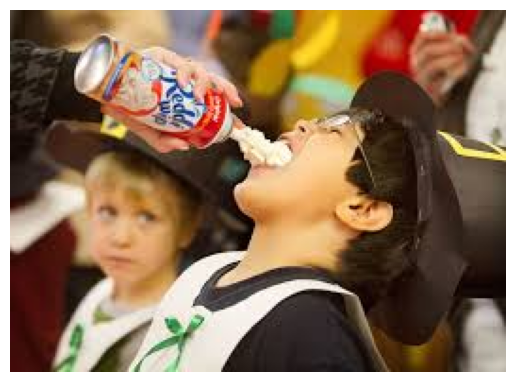

In [3]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

if __name__ == "__main__":

    image_filename = 'images1.jpg'
    
    # Show the image
    img = mpimg.imread(image_filename)
    imgplot = plt.imshow(img)
    plt.axis('off')  # Hide axis labels and ticks
    plt.show()
    # Process a single image
    
    photo = extract_features(model, image_filename)
    description = generate_desc(model_des, tokenizer, photo, max_length)
    processed_sentence = remove_start_end_seq(description)
    text_to_speech(processed_sentence)

    